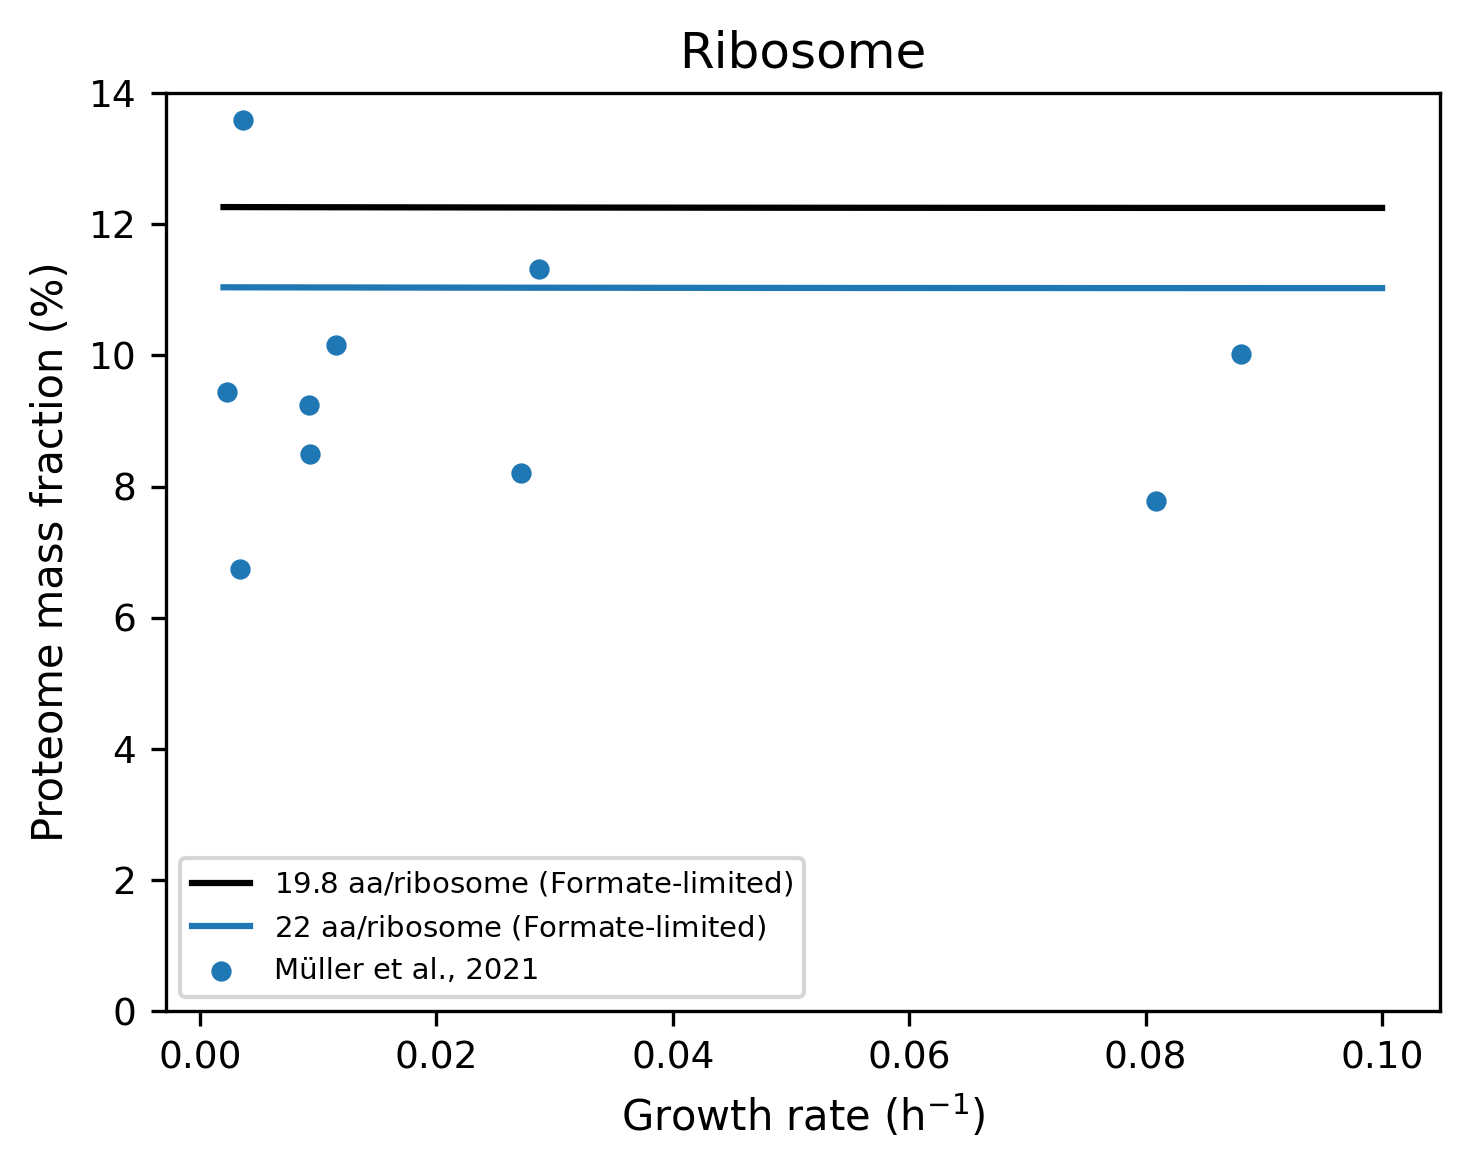

In [1]:
from simulation import Simulation
from extract_fluxes import Fluxes
import matplotlib.pyplot as plt
import  numpy as np
import pandas as pd
def limitation_simulation(kcat_ribo):
    total_protein_mass=0.6
    up_formate_ratio=0.75*total_protein_mass
    methane_id,formate_id = "R944","R895"
    # closed import H2 ,CO2 , CO ,Aceteta
    closed_reactions = ["R946", "R913", "R1165", "R983"]
    sim = Simulation()
    
    # objective is formate 
    sim.set_parameter(model_file='pcMMP.xml', objective="R895", GAM=25, NGAM=1, excel_file='pcMMP.xlsx')
    sim.set_constraint = [f"UP >= {up_formate_ratio}"]
    sim.close_reactions(closed_reactions)
    results = {
        "mu_list": [],
        "ribosome_list": [],
    }
    sim.kcat_ribo=kcat_ribo
    mus=[0.002, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09,0.1]
    for i, mu in enumerate(mus, start=1):
        sim.file_path = f"output/lp_file_formate_limited_{i}.lp"
        sim.output_file = f"output/output_formate_limited_{i}.lp"
        if sim.check_mu_optimal(mu):
            fluxes = Fluxes(sim.model, f'output/output_formate_limited_{i}.lp')
            results["mu_list"].append(mu)
            total_protein = fluxes.extract_reaction_flux("total_protein")
            results["ribosome_list"].append((fluxes.extract_reaction_flux("ribosome_mass") / total_protein)*100)

    return results

def plot_ribosome_abundance():
    result_1 = limitation_simulation(kcat_ribo=19.8)
    result_2 = limitation_simulation(kcat_ribo=22)
    plt.rcParams.update({
    "axes.titlesize": 12,
    "axes.labelsize": 10,
    "xtick.labelsize":9,
    "ytick.labelsize": 9,
    "legend.fontsize": 7
})
    plt.figure(figsize=(5, 4), dpi=300)
    ribosome_exp_formate_x=[0.003378591, 0.002283602, 0.003677198, 0.009335012, 0.009236709, 0.011536363, 0.080918156, 0.088069874, 0.027194596, 0.028672867],
    ribosome_exp_formate_y=[6.737044289, 9.443378583, 13.58925051, 8.493282875, 9.241842863, 10.16314822, 7.773513233, 10.0191943, 8.205375018, 11.31477965],

    plt.plot(result_1["mu_list"], result_1["ribosome_list"],color='black', label=r'$19.8$ aa/ribosome (Formate-limited)')
    plt.plot(result_2["mu_list"], result_2["ribosome_list"],color='#1f77b4', label=r'$22$ aa/ribosome (Formate-limited)')
    plt.scatter(ribosome_exp_formate_x,ribosome_exp_formate_y,color='#1f77b4', s=15, label="Müller et al., 2021")

    plt.xlabel("Growth rate (h$^{-1}$)")
    plt.ylabel("Proteome mass fraction (%)")
    plt.title("Ribosome")
    plt.tight_layout()
    plt.ylim(0,14)
    plt.legend()
    plt.savefig("Figures/ribosome_kcat_ribo_comparison.png", dpi=300)
    
    plt.show()
    
if __name__ == "__main__":
    plot_ribosome_abundance()